# Scaling

- We have two types of scaling

    - Z score (Standardization)

    - Min Max scalar (Normalization)


# Z Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
file_path=r'C:\Users\SHRI\Documents\DS\Data_files\Visadataset.csv'
vdf=pd.read_csv(file_path)
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
cat=vdf.select_dtypes(include='object').columns
num=vdf.select_dtypes(exclude='object').columns

In [5]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [7]:
# step 1 : take the p wage data
# step2  : calculate mean of data
# step3  : calculate std of the data
# step4  : Nr=data - mean  ste1 - step2
# step5  : z_wage = Nr / std  = step4 / step3
# step6  : create a new column visa_df['z_wage']= z_wage

In [16]:
pwage=vdf['prevailing_wage']
p_mean=pwage.mean()
std_pwage=pwage.std()
Nr=pwage-p_mean
z_wage=Nr / std_pwage
vdf['z_wage']=z_wage

In [17]:
z_wage

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

In [18]:
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [20]:
vdf[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


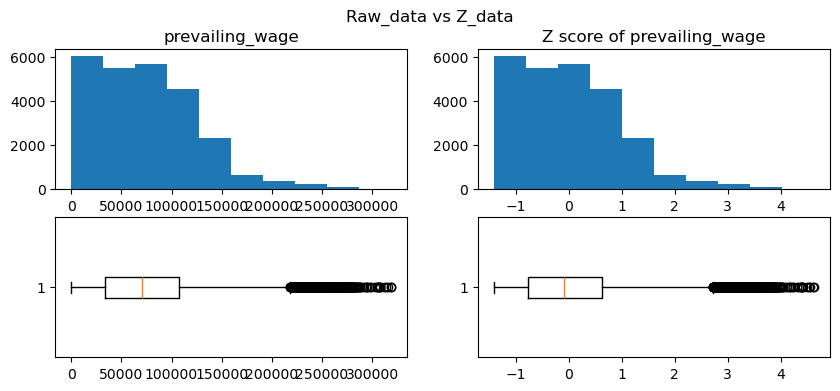

In [27]:
plt.figure(figsize=(10,4))
plt.suptitle('Raw_data vs Z_data')
plt.subplot(2,2,1).hist(pwage)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('Z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(pwage,vert=False)
plt.subplot(2,2,4).boxplot(z_wage, vert=False)
plt.show()


## StandardScaler

- sklearn

    - preprocessing

        - StandardScaler


In [28]:
# step1 : import method
# step2 : save the method
# step3 : apply the fit transform

In [34]:
from sklearn.preprocessing import StandardScaler
Ss=StandardScaler()

In [37]:
wagess=Ss.fit_transform(vdf[['prevailing_wage']])

In [38]:
vdf['wagess']=wagess

In [39]:
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wagess
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509


In [40]:
vdf[['prevailing_wage','z_wage','wagess']]

,prevailing_wage,z_wage,wagess
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [ ]:
vdf   # for whole data
vdf['prevailing_wage']   # for column only series data
vdf['prevailing_wage'].values   # for values only
vdf[['prevailing_wage']]    # for two diamensional 

In [43]:
vdf['prevailing_wage'].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [44]:
vdf['prevailing_wage'].values   # in normal value it comes in single square bracket

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ], shape=(25480,))

In [42]:
vdf['prevailing_wage'].values.reshape(-1,1)
# in reshape value it comes in double square bracket

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]], shape=(25480, 1))

In [47]:
wagess=Ss.fit_transform(vdf['prevailing_wage'].values.reshape(-1,1))

In [48]:
wagess

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]], shape=(25480, 1))

In [49]:
# step1 : read the data
# step2 : calculate min
# step3 : calculate max
# step4 : Nr=step1 - step2
# step5 : Dr=step3 - step2
# step6 : Nr/Dr
# step7 : visadf['wage_min_max']= Nr/Dr

In [51]:
file_path=r'C:\Users\SHRI\Documents\DS\Data_files\Visadataset.csv'
vdf=pd.read_csv(file_path)

In [60]:
pwage=vdf['prevailing_wage']
pwage_min=pwage.min()
pwage_max=pwage.max()
Nr=pwage-pwage_min
Dr=pwage_max-pwage_min
wage_min_max=Nr/Dr
vdf['wage_min_max']=wage_min_max

In [64]:
vdf[['wage_min_max']]

,wage_min_max
0,0.001849
1,0.261345
2,0.385312
3,0.261371
4,0.469616
...,...
25475,0.241505
25476,0.874579
25477,0.458311
25478,0.269895


In [65]:
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_min_max
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [62]:
max(wage_min_max)

1.0

## MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(vdf[['prevailing_wage']])

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]], shape=(25480, 1))